# 파이케럿(pycaret)

- 파이썬에서 작동하는 AutoML 오픈소스입니다. 
- 단순한 코드 몇 줄로 머신러닝 모델을 쉽게 구현할 수 있습니다. 
- 빠르게 피처 엔지니어링, 모델 학습, 하이퍼파라미터 튜닝, 예측을 포함하는 전체 프로세스를 실행할 수 있습니다. 
- 어디서부터 머신러닝 프로젝트를 시작해야할지, 어떤 모델부터 구현해볼지 잘 모르겠을 때 pycaret을 이용해보면 좋을 것 같습니다.

## 설치 방법

-  !pip install pycaret

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

## 1. 파이캐럿 회귀 모델 사용 

## 파이캐럿의 모듈

- 데이터  : from pycaret.datasets import get_data
- 분류모델 : from pycaret.classification import *
- 회귀모델 :from pycaret.regression import *

In [2]:
from pycaret.regression import *

## 2. 데이터 준비  : 보스턴 주택 가격

In [3]:
path = './data/boston_housing/housing.csv'

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
print(len(column_names))

14


In [5]:
data = pd.read_csv(path, header=None, delimiter=r"\s+", names=column_names)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=123)

In [8]:
X_train.shape, X_test.shape

((404, 14), (102, 14))

## 3. 파이케럿 세팅

- set_up(): pycaret을 사용하기 위한 data setting

### 매개변수 알아보기 

- session_id: random_state와 같은 개념으로 같은 결과가 나올 수 있게 seed를 고정합니다.
- data: train 데이터를 입력합니다.
- target = target 변수 이름을 입력합니다.

In [45]:
sup = setup(X_train,                # 전체 데이터
            target = 'MEDV',        # 타켓 칼럼명
            fold=5,                 # 크로스 검증 필드 
            train_size = 0.8)       # 훈련 데이터 사이즈

,Description,Value
0,Session id,8143
1,Target,MEDV
2,Target type,Regression
3,Original data shape,"(404, 14)"
4,Transformed data shape,"(404, 14)"
5,Transformed train set shape,"(323, 14)"
6,Transformed test set shape,"(81, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


## 4. 파이캐럿 모델 확인 

## 모델 확인하기 

In [46]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [47]:
comp = compare_models(sort = 'RMSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2119,10.4301,3.1186,0.8827,0.1379,0.1088,0.1460
gbr,Gradient Boosting Regressor,2.3413,11.1629,3.2447,0.8752,0.1492,0.1187,0.1360
xgboost,Extreme Gradient Boosting,2.2920,11.8007,3.3851,0.8678,0.1517,0.1143,0.1380
rf,Random Forest Regressor,2.3878,12.8134,3.4951,0.8567,0.1568,0.1214,0.1500
lightgbm,Light Gradient Boosting Machine,2.4236,12.7841,3.5169,0.8574,0.1532,0.1195,0.2420
ada,AdaBoost Regressor,2.7440,14.2174,3.7034,0.8410,0.1746,0.1445,0.1320
lr,Linear Regression,3.4794,25.9713,5.0588,0.7098,0.2741,0.1780,0.6560
lar,Least Angle Regression,3.4794,25.9713,5.0588,0.7098,0.2741,0.1780,0.2260
ridge,Ridge Regression,3.4820,26.1763,5.0701,0.7072,0.2742,0.1795,0.2560
br,Bayesian Ridge,3.5664,26.8461,5.1418,0.7001,0.2722,0.1826,0.1240


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## 5. 모델 확인 

In [48]:
comp

ExtraTreesRegressor(n_jobs=-1, random_state=8143)

### 하나의 모델을 가지고 다시 평가해보기

- fold: cross_validation의 fold 지정 (default = 10)

In [49]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9482,5.7975,2.4078,0.9379,0.1320,0.1065
1,2.9512,21.7531,4.6640,0.7460,0.1811,0.1342
2,2.6129,11.0576,3.3253,0.8807,0.1641,0.1381
3,2.3847,10.5901,3.2542,0.8878,0.1658,0.1310
4,1.8094,6.6164,2.5722,0.9236,0.1029,0.0836
Mean,2.3413,11.1629,3.2447,0.8752,0.1492,0.1187
Std,0.4207,5.6912,0.7967,0.0681,0.0281,0.0207


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [50]:
gbr

GradientBoostingRegressor(random_state=8143)

## 6 . 성능 튜닝 

-  모델의 최적화된 하이퍼파라미터 확인하기 

### Tunning
- tune_model() 함수를 사용해서 모델의 하이퍼파라미터 튜닝을 진행합니다.

In [51]:
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.6418,4.6498,2.1563,0.9502,0.1067,0.0837
1,2.6914,17.9348,4.2350,0.7906,0.1597,0.1207
2,2.3215,8.4969,2.9149,0.9083,0.1610,0.1306
3,2.3495,10.8182,3.2891,0.8853,0.1679,0.1317
4,1.8354,5.9717,2.4437,0.9311,0.1041,0.0852
Mean,2.1679,9.5743,3.0078,0.8931,0.1399,0.1104
Std,0.3789,4.6869,0.7262,0.0557,0.0283,0.0215


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## 모델에 대한 그래프 그리기 

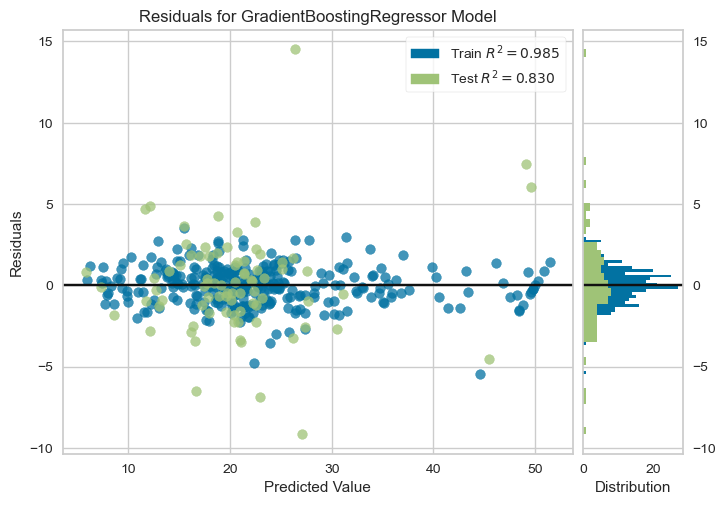

In [52]:
plot_model(tuned_gbr)

### 결과확인하기 

In [53]:
tuned_gbr

GradientBoostingRegressor(max_features='sqrt', min_impurity_decrease=0.05,
                          min_samples_leaf=3, min_samples_split=9,
                          n_estimators=160, random_state=8143, subsample=0.9)

## 7. Blending : 앙상블 모델 만들기

- blend_models() 함수를 사용하면 여러 모델들을 혼합하여 새로운 모델을 생성합니다.
- 모델을 하나씩 생성해서 blend해도 되고 compare_model을 사용하여 생성한 모델을 사용해서 blend할 수 있습니다.


In [54]:
# 방법 1
gbr_1 = create_model('gbr')
et_1 = create_model('et')

blender_2 = blend_models(estimator_list = [gbr_1, et_1])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9482,5.7975,2.4078,0.9379,0.1320,0.1065
1,2.9512,21.7531,4.6640,0.7460,0.1811,0.1342
2,2.6129,11.0576,3.3253,0.8807,0.1641,0.1381
3,2.3847,10.5901,3.2542,0.8878,0.1658,0.1310
4,1.8094,6.6164,2.5722,0.9236,0.1029,0.0836
Mean,2.3413,11.1629,3.2447,0.8752,0.1492,0.1187
Std,0.4207,5.6912,0.7967,0.0681,0.0281,0.0207


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9433,6.0481,2.4593,0.9352,0.1158,0.0966
1,2.9571,22.7348,4.7681,0.7345,0.1792,0.1343
2,2.1484,7.1906,2.6815,0.9224,0.1467,0.1192
3,2.0800,8.7033,2.9501,0.9078,0.1441,0.1078
4,1.9308,7.4737,2.7338,0.9138,0.1038,0.0860
Mean,2.2119,10.4301,3.1186,0.8827,0.1379,0.1088
Std,0.3815,6.2101,0.8394,0.0747,0.0264,0.0169


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.9010,5.5916,2.3647,0.9401,0.1207,0.0989
1,2.8578,21.4959,4.6364,0.7490,0.1745,0.1291
2,2.2583,8.2393,2.8704,0.9111,0.1515,0.1240
3,2.1493,9.0360,3.0060,0.9042,0.1501,0.1147
4,1.7678,6.5113,2.5517,0.9249,0.0976,0.0800
Mean,2.1868,10.1748,3.0858,0.8859,0.1389,0.1094
Std,0.3779,5.7903,0.8078,0.0695,0.0268,0.0179


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 앙상블을 보팅으로 처리 

In [55]:
blender_2

VotingRegressor(estimators=[('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=8143)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1,
                                                 random_state=8143))],
                n_jobs=-1)

In [56]:
best_model_5 = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2119,10.4301,3.1186,0.8827,0.1379,0.1088,0.1480
gbr,Gradient Boosting Regressor,2.3413,11.1629,3.2447,0.8752,0.1492,0.1187,0.1360
xgboost,Extreme Gradient Boosting,2.2920,11.8007,3.3851,0.8678,0.1517,0.1143,0.1360
lightgbm,Light Gradient Boosting Machine,2.4236,12.7841,3.5169,0.8574,0.1532,0.1195,0.1320
rf,Random Forest Regressor,2.3878,12.8134,3.4951,0.8567,0.1568,0.1214,0.1480
ada,AdaBoost Regressor,2.7440,14.2174,3.7034,0.8410,0.1746,0.1445,0.1360
lr,Linear Regression,3.4794,25.9713,5.0588,0.7098,0.2741,0.1780,0.1280
lar,Least Angle Regression,3.4794,25.9713,5.0588,0.7098,0.2741,0.1780,0.1220
ridge,Ridge Regression,3.4820,26.1763,5.0701,0.7072,0.2742,0.1795,0.1220
br,Bayesian Ridge,3.5664,26.8461,5.1418,0.7001,0.2722,0.1826,0.1260


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [57]:
best_model_5 

[ExtraTreesRegressor(n_jobs=-1, random_state=8143),
 GradientBoostingRegressor(random_state=8143),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=8143, ...),
 LGBMRegressor(random_state=8143),
 RandomForestRegressor(n_jobs=-1, random_state=8143)]

In [58]:
blender_5 = blend_models(best_model_5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,1.8491,5.7553,2.3990,0.9383,0.1178,0.0940
1,2.6646,20.0498,4.4777,0.7659,0.1652,0.1185
2,2.2518,8.8696,2.9782,0.9043,0.1576,0.1267
3,2.1165,8.6641,2.9435,0.9082,0.1501,0.1145
4,1.8017,7.4811,2.7352,0.9137,0.1000,0.0796
Mean,2.1368,10.1640,3.1067,0.8861,0.1381,0.1067
Std,0.3122,5.0654,0.7158,0.0613,0.0250,0.0173


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [59]:
blender_5

VotingRegressor(estimators=[('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=8143)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=8143)),
                            ('Extreme Gradient Boosting',
                             XGBRegressor(base_score=0.5, booster='gbtree',
                                          callbacks=None, colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          early_stopping_rounds=None,
                                          en...
                                          max_cat_to_onehot=4, max_delta_step=0,
                                          max_depth=6, max_leaves=0,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=-1,
                                          num_parallel_tree=1, predictor='auto',
                                          random_state=8143, ...)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(random_state=8143)),
                            ('Random Forest Regressor',
                             RandomForestRegressor(n_jobs=-1,
                                                   random_state=8143))],
                n_jobs=-1)

## 모델 확정 

In [60]:
final_model = finalize_model(blender_5)

In [61]:
final_model

Pipeline(memory=FastMemory(location=/var/folders/h4/44486vyn1_xbs13g1z50l5m00000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CRIM', 'ZN', 'INDUS', 'CHAS',
                                             'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                                             'TAX', 'PTRATIO', 'B', 'LSTAT'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strateg...
                                                           max_cat_to_onehot=4,
                                                           max_delta_step=0,
                                                           max_depth=6,
                                                           max_leaves=0,
                                                           min_child_weight=1,
                                                           missing=nan,
                                                           monotone_constraints='()',
                                                           n_estimators=100,
                                                           n_jobs=-1,
                                                           num_parallel_tree=1,
                                                           predictor='auto',
                                                           random_state=8143, ...)),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(random_state=8143)),
                                             ('Random Forest Regressor',
                                              RandomForestRegressor(n_jobs=-1,
                                                                    random_state=8143))],
                                 n_jobs=-1))])

## 예측

- finalize_model() 함수로 모델을 설정하면, cross_validation을 사용하여 적합한 모델을 전체 데이터로 마지막으로 학습을 합니다. 
마지막 모델을 설정한 후에 predict_model()을 통해 예측을 합니다.



In [62]:
data_ = X_test[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]

In [63]:
prediction = predict_model(final_model, data = data_)

In [64]:
X_test['MEDV']

410    15.0
85     26.6
280    45.4
422    20.8
199    34.9
       ... 
229    31.5
159    23.3
196    33.3
345    17.5
467    19.1
Name: MEDV, Length: 102, dtype: float64

In [65]:
prediction['prediction_label']

410    31.826470
85     26.338597
280    47.817176
422    19.512470
199    30.710302
         ...    
229    31.902035
159    26.857083
196    35.644731
345    19.674248
467    15.102681
Name: prediction_label, Length: 102, dtype: float64